<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">

# <center> **12. A brief and very preliminary introduction to deep learning!** </center>


This guide uses tf.keras, a high-level API to build and train models in TensorFlow.


##  **Outline**
1. [**DL: The most simple linear model**](#eje1)
2. [**DL: The engineering solution and activation functions**](#eje2)
3. [**DL: Training, Back-propagation and gradient descent**](#eje3)
4. [**DL: Testing: Forward propagation**](#eje4)

In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20221-H1" #@param {type:"string"}
assignment_id = group_id +'.deep_learning_intro'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "course-AI/ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

In [ ]:
#@title 2. LOAD LIB { display-mode: "form" }
#@markdown Here is important to change to GPU  

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.7.0


# **1. DL: The most simple linear model** <a name="eje1"></a>


The **most sucesful** thecnique nowadays is based on the most simple classifier: **the linear classifier!**. The basic idea is to split classes by a linear boundary with dimensions according to the features of the problem. 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/img0.png"/>


- It is the most simple classifer, from which the predicted value $\hat{y}$ is represented as a **linear combination** of input variables $\mathbf{X} = [x_1, x_2, \ldots, x_n]$, so: 

$$\hat{y}(W, X) = w_0 + x_1 w_1+ x_2 w_2+ \ldots + x_n w_n$$

  - ($x_i$) Inputs: image features, pixels  
  - ($W$) Weights associated to each of the fetures
  - ($\hat{y}$) predictions label. {cat, garfield, car ...} 
     
**How?:** 

- Fit a linear model with coefficients $w = (w_0, \ldots, w_p)$ minimizing the residual sum of squares: 

$$min_{\mathbf{w}} ||\mathbf{X}w -y ||_{2}^{2}$$

**THE PROBLEM NOW IS TO FIND $\mathbf{w}$**

### This linear equation could be represented as a network:


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/dl1.jpg" >



Why a relationship with **biological neurons**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/singleN.png" >


**Go to the action!**

## **An example with image classification** 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/imageClassification.jpeg" alt="Drawing" style="width:1700px;">

## **MNIST dataset**

The well know classification: MNIST dataset with 60000 images for training and 10000 for test. Images were taken from American Census Bureau employees and American high school students.

**Note:** This original dataset is much larger than previous one!

In [ ]:
#@title **code** Download original Mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(tf.__version__)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
2.7.0


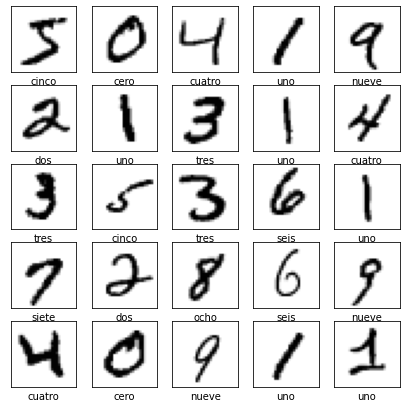

In [ ]:
#@title **code** To plot some examples
class_names = ['cero','uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve']
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [ ]:
#@title **code** To normalize and prepare data
x_train = x_train.reshape([-1, 28, 28, 1])
x_test = x_test.reshape([-1, 28, 28, 1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# **2. DNN: The engineering solution: hidden layers and activation functions**
<a name="eje2"></a>

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/ANNs.gif" style="width:400px;">

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/dl2.jpg" style="width:300px;">



## **Main componenets on DNN**


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_dl.png" alt="Drawing" style="width:1700px;">


- **input units:**  are raw information as input layer, namely a vectorized version of each sample. For MNIST is a flatten vector of 784 inputs. 
- **Hidden units:** are internal correlation on the network, which do the **magic!**. The input units and previous layers are correllated wit some **learned weights**. 
- **activation functions:** introduce non-linearity into the output of a neuron. This is important because most real world data is non linear and we want neurons to learn these non linear representations.
    - *Softmax*, used in classification tasks, takes a vector of arbitrary real-valued scores and squashes it to a vector of values between zero and one to ensure that the outputs are probabilities. 
    
    
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/actifunc.png" >


- **output units** Give the result on correlation of network units, and namelly is mapped to a **sofmax function** to give a probability of each class. On MNIST sample the output layer should be 10 because we have 10 classes. 

In [ ]:
#@title **code** Coding a DNN from Keras

model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[28, 28, 1]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# **3. DL: Training, Back-propagation and gradient descent** <a name="eje3"></a>

For **training** is used a backpropagation strategy, which consist on compute derivatives from end-to-start into the network. The backpropagation is implemented using a thecnique named **Gradient Descent**, which ‘adjust’ all weights in the network with an aim of reducing the error at the output layer.



- **Backpropagation** best trade-off between intuition and formalism [here](http://home.agh.edu.pl/~vlsi/AI/backp_t_en/backprop.html)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/dl3.gif" >


- **Stochastic gradient descent:**  select randomly a sub-set for training  because the high dimensional problem on DNN
- **Epochs** number of times that an **ENTIRE** dataset is passed orward and backward through the DNN
- **Batch size** is the sub-set of training examples to pass into during gradient descent training. For stochastic gradient descent is used the concep of mini-batch

In [ ]:
#@title **code** Training a DNN
model.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6374 - accuracy: 0.8379
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3333 - accuracy: 0.9075
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2839 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2540 - accuracy: 0.9287
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2310 - accuracy: 0.9352


# **4. DL: Testing: Forward propagation** <a name="eje4"></a>

Once we have trained our DNN, we follow a classical evaluation of a machine learning dataset. In such case we will to evaluate the accuracy:

In [ ]:
#@title **code** Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2129 - accuracy: 0.9394
Test accuracy: 0.9394000172615051


see more deeply on predictions

In [ ]:
#@title **code** How work predictions?
predictions = model.predict(x_test)
print(predictions[5125])
print("valor predicho:",  np.argmax(predictions[5125]), "max prob: ", np.max(predictions[5125]),
      "ground truth: ", y_test[5125] )

[1.7908056e-05 1.0016137e-06 9.9914384e-01 4.0318999e-05 2.5273704e-07
 4.2462914e-05 4.2844880e-05 3.6888075e-06 6.8287866e-04 2.4749394e-05]
valor predicho: 2 max prob:  0.99914384 ground truth:  2


Now, we can evaluate single examples, even new examples

the number predicted is:  2


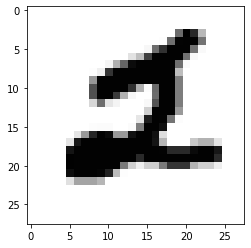

In [ ]:
#@title **code** individual predictions
img_rows, img_cols =28, 28
image_index = 5125
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print("the number predicted is: ", pred.argmax())

<Figure size 432x288 with 0 Axes>

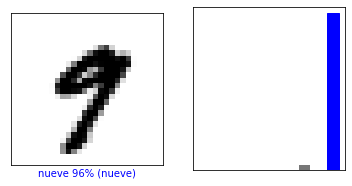

In [ ]:
#@title **code** Performance on predictions
%run code/dl_plot.py
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

<Figure size 432x288 with 0 Axes>

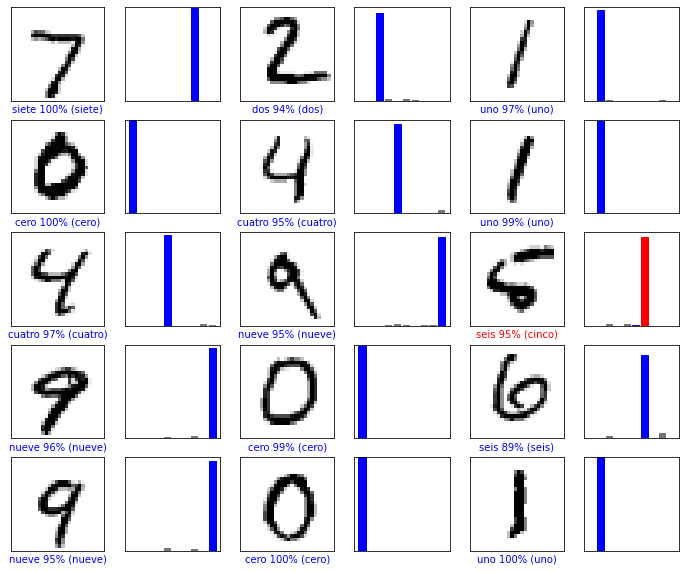

In [ ]:
#@title **code** Batch of predictions
%run code/dl_plot.py
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

(10000, 10)
matrix de confusión en test
 [[ 961    0    3    1    0    4    8    1    2    0]
 [   0 1113    2    2    0    1    4    2   11    0]
 [   8    4  959   10   10    0   11   12   16    2]
 [   1    0   22  936    0   20    1   15   13    2]
 [   1    1    4    0  929    0   11    2    7   27]
 [   9    2    1   27    6  803   15    3   18    8]
 [   9    3    5    1    9    9  918    2    2    0]
 [   2    8   25    5    7    0    0  960    3   18]
 [   3    6    5   18    8   16   12    8  893    5]
 [   8    7    1    9   36    7    1   12    6  922]]
verifica número de imágenes en total por fila
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


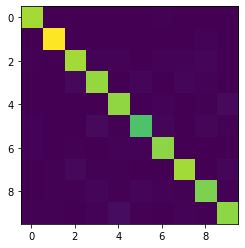

In [ ]:
#@title **code** confussion matrices to underestand results
from sklearn.metrics import confusion_matrix
print(predictions.shape)
labels_pred = np.argmax(predictions, axis=1)
cm_test = confusion_matrix(y_test, labels_pred)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))
plt.imshow(cm_test)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


1. Change configuration with two different activation function: tanh, elu
2. Built a deep neural network with:
    - one hidden layer of 512 neurons and relu activation
    - one hidden layers of 128. 
3. Try with a more challenge dataset: for instance: **fashion mnist**



In [ ]:
#@title **code student**
#1. point




test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

In [ ]:
#@title **code student**
#2. point





test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

# 5. **DL: CNN example**

Today there exist many DL architectures, designed for especific purposes. For instance, for image problem (matricial inputs), the Convolutional neuronal net architectures are able to successfully capture the Spatial dependencies of the images, through the learning of most descriptive filters.

### **Convolutions**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/Convolution_schematic.gif" style="width:150px">

It is a **fundamental** operation to compute **visual features**.  For instance, a **KERNEL** mask with size $3 \times 3$ is sliding around the image. 


In typical, images with three channels, the convolution works, as: 
<img width="500" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-3.gif"> 


### **CNN**

<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN.png">  

In [ ]:
#@title **code** Download original Mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(tf.__version__)

In [ ]:
#@title **code** To normalize and prepare data
x_train = x_train.reshape([-1, 28, 28, 1])
x_test = x_test.reshape([-1, 28, 28, 1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train_ohe.shape, y_test_ohe.shape)

In [ ]:
#@title **code** CNN model
model_CNN =  tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(64, activation='relu'))
model_CNN.add(tf.keras.layers.Dense(10, activation='softmax'))
model_CNN.summary()

In [ ]:
#@title **code** Training a DNN
model_CNN.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_CNN.fit(x_train, y_train_ohe, epochs=5)

In [ ]:
#@title **code** Evaluating the model
test_loss, test_acc = model_CNN.evaluate(x_test, y_test_ohe)

print('Test accuracy:', test_acc)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Try other CNN configuration

# **References**

[1] Tensorflow: https://www.tensorflow.org/


[2] Playground: http://playground.tensorflow.org/


[3] Udacity deep learning course: https://classroom.udacity.com/courses/ud730

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">